In [78]:
import pandas as pd
import csv
import matplotlib.pyplot as plt



data = pd.read_csv("HR_comma_sep.csv")
print(data.shape)
left = data[data.left==1]

retained = data[data.left==0]

data.groupby('left').mean()

(14999, 10)


satisfaction_level  last_evaluation  number_project  \
left                                                        
0               0.666810         0.715473        3.786664   
1               0.440098         0.718113        3.855503   

      average_montly_hours  time_spend_company  Work_accident  \
left                                                            
0               199.060203            3.380032       0.175009   
1               207.419210            3.876505       0.047326   

      promotion_last_5years  
left                         
0                  0.026251  
1                  0.005321

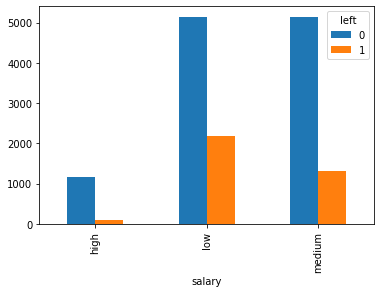

In [79]:
pd.crosstab(data.salary,data.left).plot(kind='bar')
plt.show()

In [80]:
final = data[["satisfaction_level", "average_montly_hours", "promotion_last_5years", "salary"]]
final.head()

satisfaction_level  average_montly_hours  promotion_last_5years  salary
0                0.38                   157                      0     low
1                0.80                   262                      0  medium
2                0.11                   272                      0  medium
3                0.72                   223                      0     low
4                0.37                   159                      0     low

In [81]:
salary_dummy = pd.get_dummies(final.salary, prefix="salary")
all_data = pd.concat([final,salary_dummy], axis = 'columns')
all_data

satisfaction_level  average_montly_hours  promotion_last_5years  \
0                    0.38                   157                      0   
1                    0.80                   262                      0   
2                    0.11                   272                      0   
3                    0.72                   223                      0   
4                    0.37                   159                      0   
...                   ...                   ...                    ...   
14994                0.40                   151                      0   
14995                0.37                   160                      0   
14996                0.37                   143                      0   
14997                0.11                   280                      0   
14998                0.37                   158                      0   

       salary  salary_high  salary_low  salary_medium  
0         low            0           1              0  
1      medium            0           0              1  
2      medium            0           0              1  
3         low            0           1              0  
4         low            0           1              0  
...       ...          ...         ...            ...  
14994     low            0           1              0  
14995     low            0           1              0  
14996     low            0           1              0  
14997     low            0           1              0  
14998     low            0           1              0  

[14999 rows x 7 columns]

In [82]:

all_data.drop('salary', axis ='columns', inplace= True)
all_data

satisfaction_level  average_montly_hours  promotion_last_5years  \
0                    0.38                   157                      0   
1                    0.80                   262                      0   
2                    0.11                   272                      0   
3                    0.72                   223                      0   
4                    0.37                   159                      0   
...                   ...                   ...                    ...   
14994                0.40                   151                      0   
14995                0.37                   160                      0   
14996                0.37                   143                      0   
14997                0.11                   280                      0   
14998                0.37                   158                      0   

       salary_high  salary_low  salary_medium  
0                0           1              0  
1                0           0              1  
2                0           0              1  
3                0           1              0  
4                0           1              0  
...            ...         ...            ...  
14994            0           1              0  
14995            0           1              0  
14996            0           1              0  
14997            0           1              0  
14998            0           1              0  

[14999 rows x 6 columns]

In [86]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
x = all_data
y = data.left
model1 = KernelRidge(kernel='linear')

#train data
rkf = RepeatedKFold(n_splits=5, n_repeats=1, random_state=0)
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.4, random_state = 1) 
lm = model1
lm.fit(xTrain,yTrain)
ypredictions = lm.predict(xTest)
print(ypredictions)
score1 = cross_val_score(model1, x, y, scoring='r2', cv=rkf).mean()
print("r2=", score1)


[0.17871097 0.30103487 0.22582431 ... 0.37955232 0.16631125 0.25373444]
r2= 0.17478604042856546


In [87]:
X= all_data
y = data.left

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.3)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, y_train)



C:\Users\mange\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
model.predict(X_test)
model.score(X_test, y_test)

0.7774285714285715